## HackerEarth Machine Learning Challenge. Predict the power that is generated in kW/h provided in the dataset

### EDA

#### Introduction to dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.pandas.set_option('display.max_rows',None)
pd.pandas.set_option('display.max_columns',None)

In [3]:
#load data
data_train = pd.read_csv('D:\\Hackathon\\predict the power\\dataset\\train.csv')
data_test = pd.read_csv('D:\\Hackathon\\predict the power\\dataset\\test.csv')

In [4]:
data_train.head(3)

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342


In [5]:
data_test.head(3)

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,16681.044117,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,NaN,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,214812.836175,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677


In [6]:
print('Train Test',data_train.shape)
print('Test Test',data_test.shape)

Train Test (28200, 22)
Test Test (12086, 21)


#### Find the NULL values

In [7]:
for col in data_train.columns:
    if data_train[col].isnull().sum()>0:
        print(col,'----------',data_train[col].isnull().sum(),'----------',round(data_train[col].isnull().sum()/len(data_train)*100,2),'%')

wind_speed(m/s) ---------- 273 ---------- 0.97 %
atmospheric_temperature(°C) ---------- 3450 ---------- 12.23 %
shaft_temperature(°C) ---------- 2 ---------- 0.01 %
blades_angle(°) ---------- 216 ---------- 0.77 %
gearbox_temperature(°C) ---------- 1 ---------- 0.0 %
engine_temperature(°C) ---------- 12 ---------- 0.04 %
motor_torque(N-m) ---------- 24 ---------- 0.09 %
generator_temperature(°C) ---------- 12 ---------- 0.04 %
atmospheric_pressure(Pascal) ---------- 2707 ---------- 9.6 %
windmill_body_temperature(°C) ---------- 2363 ---------- 8.38 %
wind_direction(°) ---------- 5103 ---------- 18.1 %
resistance(ohm) ---------- 1 ---------- 0.0 %
rotor_torque(N-m) ---------- 572 ---------- 2.03 %
turbine_status ---------- 1759 ---------- 6.24 %
cloud_level ---------- 276 ---------- 0.98 %
blade_length(m) ---------- 5093 ---------- 18.06 %
windmill_height(m) ---------- 543 ---------- 1.93 %
windmill_generated_power(kW/h) ---------- 207 ---------- 0.73 %


In [8]:
for col in data_test.columns:
    if data_test[col].isnull().sum()>0:
        print(col,'----------',data_test[col].isnull().sum(),'----------',round(data_test[col].isnull().sum()/len(data_test)*100,2),'%')

wind_speed(m/s) ---------- 126 ---------- 1.04 %
atmospheric_temperature(°C) ---------- 1427 ---------- 11.81 %
shaft_temperature(°C) ---------- 1 ---------- 0.01 %
blades_angle(°) ---------- 106 ---------- 0.88 %
gearbox_temperature(°C) ---------- 1 ---------- 0.01 %
engine_temperature(°C) ---------- 5 ---------- 0.04 %
motor_torque(N-m) ---------- 11 ---------- 0.09 %
generator_temperature(°C) ---------- 5 ---------- 0.04 %
atmospheric_pressure(Pascal) ---------- 1151 ---------- 9.52 %
area_temperature(°C) ---------- 1 ---------- 0.01 %
windmill_body_temperature(°C) ---------- 926 ---------- 7.66 %
wind_direction(°) ---------- 2160 ---------- 17.87 %
rotor_torque(N-m) ---------- 281 ---------- 2.33 %
turbine_status ---------- 797 ---------- 6.59 %
cloud_level ---------- 125 ---------- 1.03 %
blade_length(m) ---------- 2114 ---------- 17.49 %
windmill_height(m) ---------- 255 ---------- 2.11 %


In [9]:
#No of values in turbine_status field

data_train['turbine_status'].value_counts()

BB     1946
AAA    1939
BCB    1933
B2     1931
A      1930
D      1922
B      1882
AB     1868
ABC    1867
A2     1855
BA     1854
AC     1850
BD     1843
BBB    1821
Name: turbine_status, dtype: int64

In [10]:
##No of values in cloud_level field

data_train['cloud_level'].value_counts()#[:2]

Low              13921
Medium           13704
Extremely Low      299
Name: cloud_level, dtype: int64

### Feature Engineering

In [11]:
#dummy variable creation for categorical variable cloud_level

data_train = pd.get_dummies(data_train,columns=['cloud_level'])

#Test set

data_test = pd.get_dummies(data_test,columns=['cloud_level'])

In [12]:
#label encoding done for the field turbine_status

from sklearn import preprocessing
lb = preprocessing.LabelEncoder()

data_train['turbine_status'].ffill(inplace=True)
data_train['turbine_status'] = data_train['turbine_status'].astype('category')

data_train['turbine_status'] = lb.fit_transform(data_train['turbine_status'])

#Test set

data_test['turbine_status'].ffill(inplace=True)
data_test['turbine_status'] = data_test['turbine_status'].astype('category')

data_test['turbine_status'] = lb.fit_transform(data_test['turbine_status'])

In [13]:
data_train.head(3)

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),cloud_level_Extremely Low,cloud_level_Low,cloud_level_Medium
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,8,2.217542,0.314065,24.281689,6.766521,0,0,1
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,1,4.210346,0.448494,27.262139,5.966275,0,0,1
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,4,2.719475,0.302321,27.366127,2.874342,0,0,1


In [14]:
#Extract month and no-of-weeks from the time stamp

data_train['datetime'] = pd.to_datetime(data_train['datetime'])

data_train['date_month'] = data_train['datetime'].apply(lambda x: x.month)
data_train['date_week'] = data_train['datetime'].apply(lambda x: x.week)

In [15]:
#Test set

data_test['datetime'] = pd.to_datetime(data_test['datetime'])

data_test['date_month'] = data_test['datetime'].apply(lambda x: x.month)
data_test['date_week'] = data_test['datetime'].apply(lambda x: x.week)

### Preprocessing the data

In [16]:
#The target field has NULLs windmill_generated_power(kW/h)

data_train['windmill_generated_power(kW/h)'].isnull().sum()

207

In [17]:
#shape of data before dropping columns with NULL
data_train.shape

(28200, 26)

In [18]:
data_train.dropna(subset=['windmill_generated_power(kW/h)'],inplace=True) #Rows have been droped where target is NULL

In [19]:
#shape of data after dropping NULL
data_train.shape

(27993, 26)

In [20]:
# data set for train - after remove two columns

df_train = data_train.iloc[:,2:]
df_train.head(2)

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),cloud_level_Extremely Low,cloud_level_Low,cloud_level_Medium,date_month,date_week
0,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,8,2.217542,0.314065,24.281689,6.766521,0,0,1,8,31
1,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,1,4.210346,0.448494,27.262139,5.966275,0,0,1,11,45


In [21]:
#test set

df_test = data_test.iloc[:,2:]
df_test.head(2)

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,blade_length(m),blade_breadth(m),windmill_height(m),cloud_level_Extremely Low,cloud_level_Low,cloud_level_Medium,date_month,date_week
0,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,16681.044117,24.004812,43.756693,445.976992,1664.222023,21.912243,8,3.185837,0.403965,25.572431,0,0,1,4,16
1,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,NaN,29.431813,42.728174,499.595287,1165.111992,-35.050093,0,3.016603,0.444755,24.371823,0,0,1,3,13


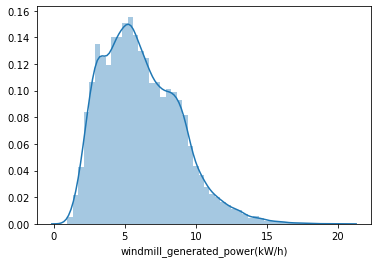

In [22]:
#Distribution of target variable

sns.distplot(df_train['windmill_generated_power(kW/h)'])

### Preparation for Model Building

In [23]:
#split the data into X & y; label and feature component

X=df_train.drop(['windmill_generated_power(kW/h)'],axis=1)
y=np.log1p(df_train['windmill_generated_power(kW/h)'])
# y=df_train['windmill_generated_power(kW/h)']

In [24]:
#features names of the dataset

features = df_train.drop(['windmill_generated_power(kW/h)'],axis=1).columns

In [25]:
#split of train and validation set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#scale the data of test

Test_scaled = scaler.transform(df_test)

### Machine Learning Algorithms application

In [28]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
model_xgb = XGBRegressor(n_estimators=300, max_depth=6,learning_rate=0.12,reg_lambda=0.01)

model_xgb.fit(X_train,y_train) #train the algo with data

predict_xgb = np.expm1(model_xgb.predict(X_test)) # predict as per training
y_test_new = np.expm1(y_test) 

# predict_xgb =model_xgb.predict(X_test) # predict as per training
# y_test_new = y_test

#accuracy matrics tested


print('mean_squared_error',mean_squared_error(y_test_new,predict_xgb)) 
print('R2',r2_score(y_test_new,predict_xgb))
print('Metrics asked for', max(0,100*r2_score(y_test_new,predict_xgb)))

mean_squared_error 0.26569514739665395
R2 0.9628360564321239
Metrics asked for 96.28360564321238


In [30]:
#Train set

pred_train = np.expm1(model_xgb.predict(X_train))
y_train_new = np.expm1(y_train)

print('mean_squared_error',mean_squared_error(y_train_new,pred_train)) 
print('R2',r2_score(y_train_new,pred_train))
print('Metrics asked for', max(0,100*r2_score(y_train_new,pred_train)))

mean_squared_error 0.06827854594255817
R2 0.9906845828328493
Metrics asked for 99.06845828328493


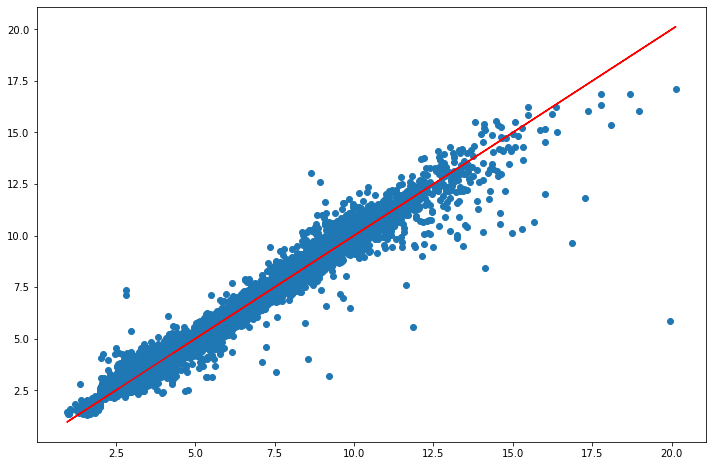

In [31]:
#prediction plot
plt.figure(figsize=(12,8))
plt.scatter(y_test_new,predict_xgb)
plt.plot(y_test_new,y_test_new,'r')

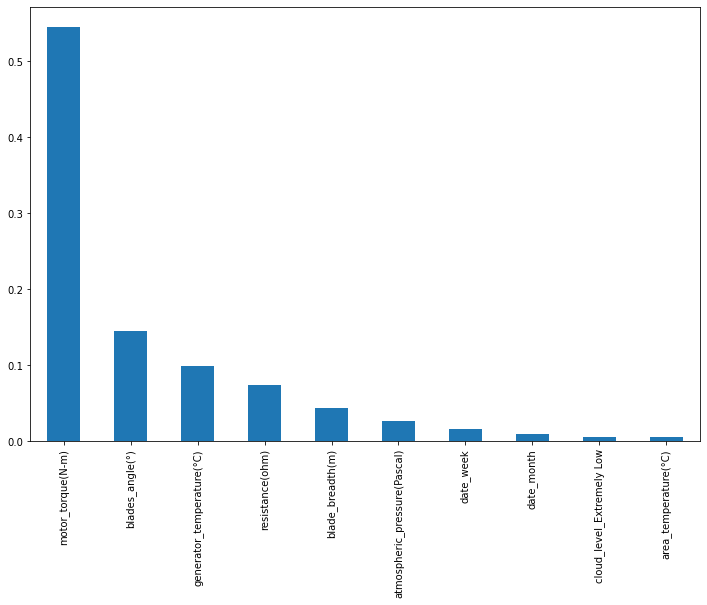

In [32]:
#Feature importance plot

imp_feat=pd.Series(model_xgb.feature_importances_,index=features)
plt.figure(figsize=(12,8))
imp_feat.sort_values(ascending=False)[:10].plot(kind='bar')

### Prediction for test set

In [33]:
final_prediction = np.expm1(model_xgb.predict(Test_scaled))

In [34]:
final_df = pd.DataFrame({'tracking_id':data_test['tracking_id'],'datetime':data_test['datetime'],'windmill_generated_power(kW/h)':final_prediction})
final_df.head()

,tracking_id,datetime,windmill_generated_power(kW/h)
0,WM_19817,2019-04-17 08:53:20,2.480834
1,WM_18723,2019-03-30 07:43:20,2.405610
2,WM_34552,2019-08-10 11:33:20,3.529266
3,WM_28570,2019-06-26 03:53:20,6.078834
4,WM_36934,2019-08-27 16:43:20,3.531116


In [45]:
# final_df.to_csv('Submission007.csv',index=False)